In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score

In [147]:
cols=[ 'fLength','fWidth','fWidth1','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df= pd.read_csv(r"C:\Users\fnjpk\Downloads\magic04.data",names=cols)
df.head()

,fLength,fWidth,fWidth1,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fWidth1   19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [149]:
df['class']=df['class'].map({'g':1,'h':0})

In [150]:
df.head()

,fLength,fWidth,fWidth1,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fWidth1   19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.6 MB


<Axes: >

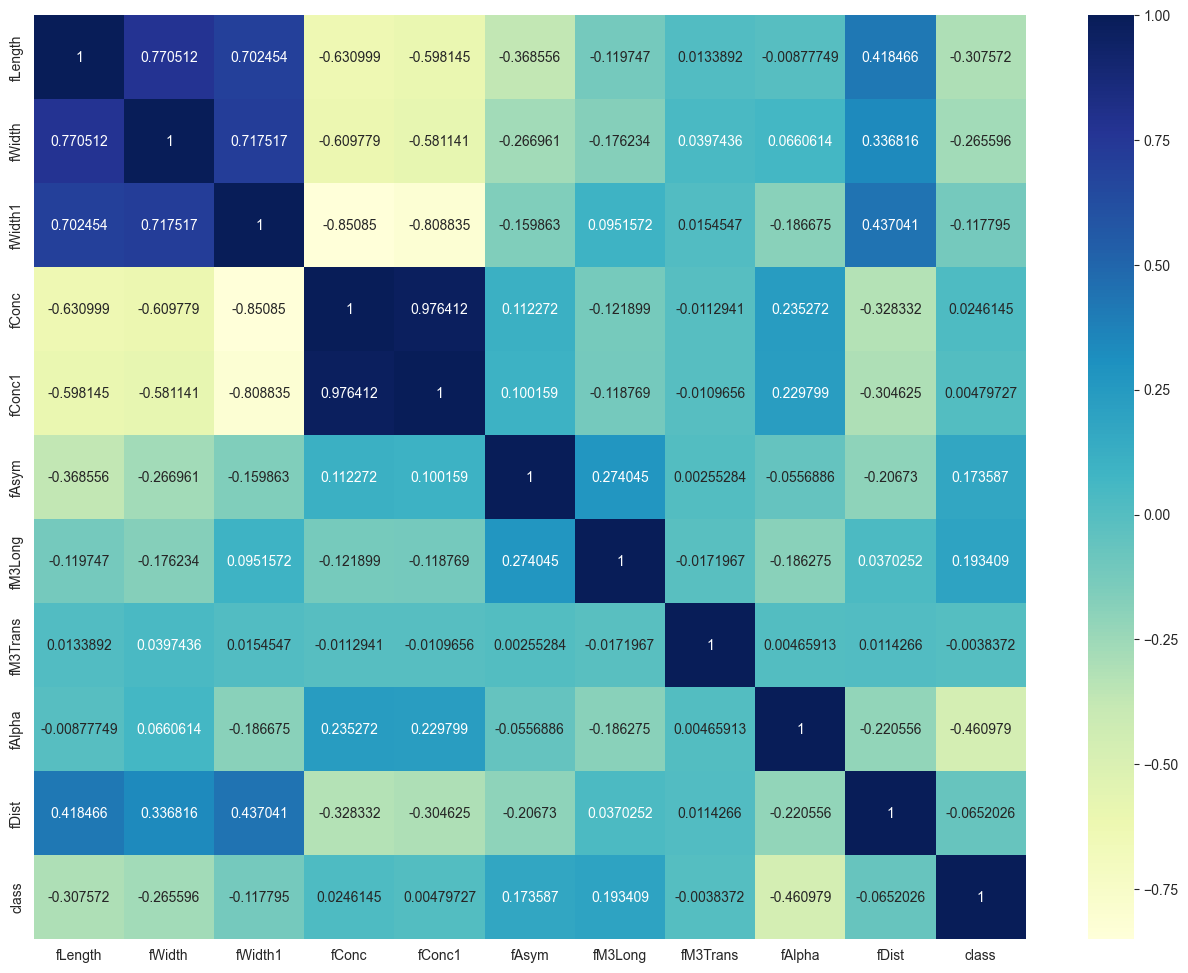

In [152]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(numeric_only='True'),annot=True,fmt='g',cmap='YlGnBu')

If you want to use only half matrix do the following

Text(0.5, 1.0, 'Lower Triangular Heatmap')

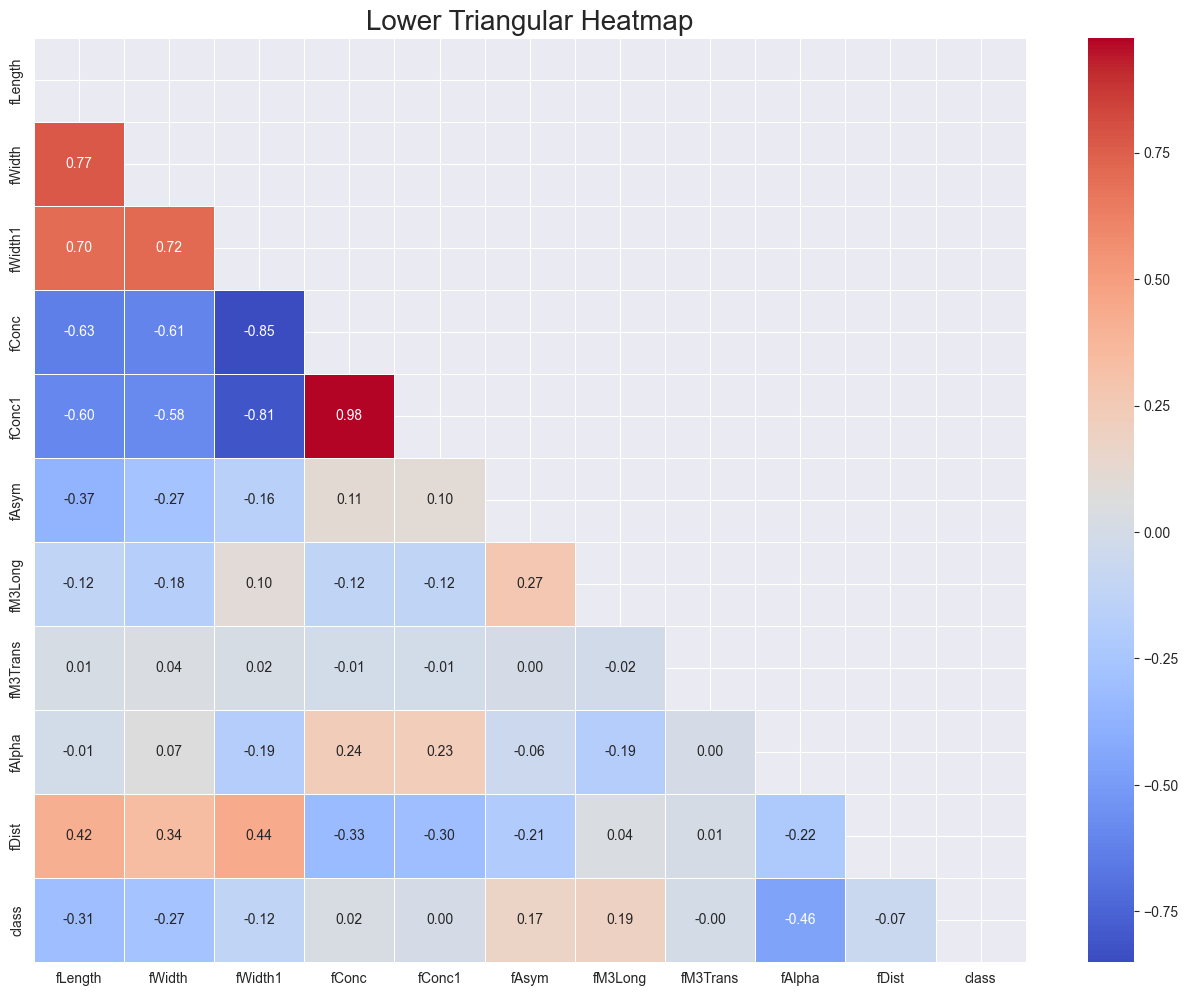

In [153]:
mask= np.triu(np.ones_like(df.corr(numeric_only=True),dtype=bool))
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(numeric_only=True),mask=mask,annot=True,fmt='.2f',cmap='coolwarm',linewidths=.5)
plt.title('Lower Triangular Heatmap',fontsize=20)

In [154]:
df.isnull().sum()

fLength     0
fWidth      0
fWidth1     0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [155]:
x=df.drop(columns=['class'],axis=1)
y=df['class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [156]:
logmodel=RandomForestClassifier(n_estimators=100,random_state=101)
logmodel.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [157]:
a=logmodel.predict(x_test)
#logmodel.score(x_test,y_test)
print('F1_score:',f1_score(y_test,logmodel.predict(x_test)))

F1_score: 0.912958371395015


In [158]:
c=confusion_matrix(y_test,a)
print(c)

[[1541  428]
 [ 239 3498]]


In [159]:
accuracy=accuracy_score(y_test,a)
accuracy

0.88310550297932

In [160]:
recall = recall_score(y_test,a)
recall

0.936044955846936

In [161]:
report = classification_report(y_test,a,output_dict=True)

In [162]:
my_report=pd.DataFrame(report).transpose()
my_report

,precision,recall,f1-score,support
0,0.865730,0.782631,0.822086,1969.000000
1,0.890983,0.936045,0.912958,3737.000000
accuracy,0.883106,0.883106,0.883106,0.883106
macro avg,0.878357,0.859338,0.867522,5706.000000
weighted avg,0.882269,0.883106,0.881601,5706.000000


In [163]:
from sklearn.pipeline import Pipeline

In [164]:
pipeline=Pipeline([('scaler',StandardScaler()),('clf',LogisticRegression(max_iter=10000))])
pipeline.fit(x_train,y_train)
b=pipeline.predict(x_test)
print(classification_report(y_test,b))

              precision    recall  f1-score   support

           0       0.77      0.61      0.68      1969
           1       0.82      0.90      0.86      3737

    accuracy                           0.80      5706
   macro avg       0.79      0.76      0.77      5706
weighted avg       0.80      0.80      0.80      5706



In [165]:
param_grid ={
    # 'clf_n_estimators':[50,100,200],
    # 'clf_max_depth':[None,10,15],
    'clf__C':[0.1,1,10],
    'clf__penalty':['l2'],
    'clf__solver':['liblinear']
}
grid=GridSearchCV(pipeline,param_grid,cv=5,n_jobs=-1,verbose=1,error_score='raise')
grid.fit(x_train,y_train)
print('Best Parameters:',grid.best_params_)
c=grid.predict(x_test)
print(classification_report(y_test,c))


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.77      0.61      0.68      1969
           1       0.82      0.90      0.86      3737

    accuracy                           0.80      5706
   macro avg       0.79      0.76      0.77      5706
weighted avg       0.80      0.80      0.80      5706



In [166]:
import joblib
joblib.dump(grid.best_estimator_, 'best_model.pkl')


['best_model.pkl']

In [168]:
gamma_row = df[df['class'] == 1].iloc[0:1]
X_gamma = gamma_row.drop(columns=['class'])

# Use trained model from the pipeline
grid.best_estimator_.predict(X_gamma)

print(df.columns.tolist())

['fLength', 'fWidth', 'fWidth1', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']


In [171]:
import joblib
model = joblib.load("best_model.pkl")
print(model)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(C=1, max_iter=10000, solver='liblinear'))])


In [172]:
gamma = df[df['class'] == 1].iloc[0]
gamma.drop('class')


fLength     28.7967
fWidth      16.0021
fWidth1      2.6449
fConc        0.3918
fConc1       0.1982
fAsym       27.7004
fM3Long     22.0110
fM3Trans    -8.2027
fAlpha      40.0920
fDist       81.8828
Name: 0, dtype: float64